In [1]:
import numpy as np

In [2]:
#サンプルデータの全結合層による変換

#重み
w1 = np.random.randn(2, 4)
#バイアス（broadcastで(10, 4)に）
b1 = np.random.randn(4)
#入力
x = np.random.randn(10, 2)
h = np.dot(x, w1) + b1
h

array([[-1.30111794e+00, -1.59610645e+00, -4.30814565e-01,
        -2.43927452e-01],
       [-1.23126153e+00, -2.67582037e+00,  4.92127716e+00,
        -2.90233329e+00],
       [-1.39340317e+00, -1.48250797e+00,  4.70989183e-01,
        -9.86525378e-01],
       [-1.67487780e+00, -7.31879427e-01,  7.67215725e-01,
        -1.94170014e+00],
       [-1.51887872e+00, -1.14490915e+00,  5.84918360e-01,
        -1.40265114e+00],
       [-1.18153309e+00, -2.49607433e+00,  2.97202915e+00,
        -1.72126401e+00],
       [-1.44491048e+00, -1.49213424e+00,  1.41780862e+00,
        -1.63767043e+00],
       [-9.71330529e-01, -2.74555163e+00,  8.61642718e-01,
         2.35018658e-04],
       [-1.57712637e+00, -8.05687086e-01, -4.70508014e-01,
        -1.00435391e+00],
       [-1.10411050e+00, -2.52156261e+00,  1.79148674e+00,
        -8.72001333e-01]])

In [3]:
#sigmoid func
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

a = sigmoid(h)
a

array([[0.21397693, 0.1685265 , 0.39393184, 0.43931872],
       [0.2259607 , 0.06441531, 0.99276294, 0.05203834],
       [0.19886502, 0.1850489 , 0.61561786, 0.27159893],
       [0.15777492, 0.32478244, 0.68291829, 0.1254612 ],
       [0.17962669, 0.24142018, 0.64219833, 0.19739575],
       [0.23477666, 0.07613384, 0.95129438, 0.15170842],
       [0.19078608, 0.18360161, 0.80499465, 0.1627823 ],
       [0.27461538, 0.06033837, 0.70300375, 0.50005875],
       [0.17120284, 0.30881031, 0.38449601, 0.26808625],
       [0.2489705 , 0.07436032, 0.85710946, 0.29483804]])

In [4]:
#入力2, 隠れ層4, 出力3の2層のNN
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(10, 2)
w1 = np.random.randn(2, 4)
b1 = np.random.randn(4)
w2 = np.random.randn(4, 3)
b2 = np.random.randn(3)

#1層目
h = np.dot(x, w1) + b1
#活性化関数で非線形なこうか
a = sigmoid(h)
#2層目
s = np.dot(a, w2) + b2
s

#→3クラス分類が可能

array([[ 1.09194829,  0.41765097, -0.7221225 ],
       [ 1.07133071,  0.71832877, -0.5776828 ],
       [ 1.30859703,  0.16459501, -1.03527619],
       [ 1.0648267 ,  0.4662285 , -0.68692476],
       [ 1.0286194 ,  0.8504175 , -0.59767486],
       [ 1.23006562,  0.69379213, -0.48017737],
       [ 1.24953278,  0.71956775, -0.4349126 ],
       [ 1.25439626,  0.40651105, -0.76979014],
       [ 1.16582192,  0.20479737, -0.93145003],
       [ 1.16371724,  0.28107381, -0.85685151]])

In [5]:
### sigmoid, affineレイヤの実装
class sigmoid:
    def __init__(self) -> None:
        self.params = []
        
    def forward(self, x):
        return 1 / (1 + np.exp(-x))
    
class affine:
    def __init__(self, W, b) -> None:
        self.params = [W, b]
        
    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        return out


        

In [6]:
aff = affine(np.random.randn(2, 4), np.random.randn(4))
sig = sigmoid()
h = aff.forward(np.random.randn(10, 2))
a = sig.forward(h)
a

array([[0.7977153 , 0.40721654, 0.50611317, 0.74081672],
       [0.15451781, 0.58018064, 0.58818607, 0.78795299],
       [0.9495838 , 0.3847232 , 0.35192309, 0.50251744],
       [0.51890357, 0.67546463, 0.21691924, 0.16025231],
       [0.34987146, 0.49461139, 0.60265361, 0.82696787],
       [0.54138949, 0.6338392 , 0.26855748, 0.25030468],
       [0.15750597, 0.682281  , 0.39176517, 0.44184192],
       [0.50672843, 0.34907102, 0.76055811, 0.95618409],
       [0.40596719, 0.57836004, 0.4238082 , 0.54645025],
       [0.01989557, 0.75764648, 0.50775245, 0.59993457]])

In [7]:
#affine and sigmoid matometa class twolayernet
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size) -> None:
        I, H, O = input_size, hidden_size, output_size
        
        #重みとバイアスの初期化
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)
        
        #レイヤの生成
        self.layers = [
            affine(W1, b1),
            sigmoid(),
            affine(W2, b2)
        ]
        
        self.params = []
        for layer in self.layers:
            self.params += layer.params
            
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    


In [8]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
model.predict(x)

array([[-1.9790723 , -1.33517635,  1.32486085],
       [-2.11843661, -0.88149753,  2.1024042 ],
       [-2.00046525, -1.26118791,  1.42048792],
       [-2.00954406, -1.3251677 ,  1.50653809],
       [-1.96983519, -1.08896767,  1.4146438 ],
       [-1.82069122, -1.90557162,  0.92542985],
       [-2.04497657, -1.11469955,  1.94354549],
       [-2.04570563, -1.15697187,  1.62302367],
       [-2.02843498, -1.25705555,  1.8108426 ],
       [-1.82846057, -1.63695851,  0.59522423]])

In [13]:
#逆伝播のめっちゃ簡単なやつ実装

#列数D，行数N
D, N = 8, 7
#入力
x = np.random.randn(1, D)
y = np.repeat(x, N, axis=0)
#仮の勾配
dy = np.random.randn(N, D)
#keepdims= Trueで二次元配列を保っている
dx = np.sum(dy, axis=0, keepdims=True)
dx.shape

(1, 8)

In [ ]:
#逆伝播ノードの実装

class MatMul:
    def __init__(self, W) -> None:
        self.params = [W]
        #Wの要素数を0で初期化
        self.grads = [np.zeros_like(W)]
        self.x = None
        
    def forward(self, x):
        W, = self.params
        out = np.dot(x, W)
        #xの更新
        self.x = x
        return out
    
    #dout = dL / dy
    def backward(self, dout):
        W, = self.params
        #dL/dxの計算
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        #3点リーダー(本の説明めっちゃわかりいい)
        #おそらく参照渡しとかの話．知らんけど
        self.grads[0][...] = dW
        return dx
    

In [14]:
### sigmoid, affine class -> backward
class sigmoid:
    def __init__(self) -> None:
        self.params, self.grads = [], []
        self.out = None
        
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out
    
    def backward(self, dout):
        dx = dout * self.out * (1 - self.out)
        return dx
    
class affine:
    def __init__(self, W, b) -> None:
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None
        
    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        self.x = x
        return out

    def backward(self, dout):
        W, b = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        db = np.sum(dout, axis=0)
        #3点リーダー(本の説明めっちゃわかりいい)
        #おそらく参照渡しとかの話．知らんけど
        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx
        

In [15]:
class SoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.y = None  # softmaxの出力
        self.t = None  # 教師ラベル

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)

        # 教師ラベルがone-hotベクトルの場合、正解のインデックスに変換
        if self.t.size == self.y.size:
            self.t = self.t.argmax(axis=1)

        loss = cross_entropy_error(self.y, self.t)
        return loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx = dx / batch_size

        return dx

In [16]:
## 最急降下法
class SGD:
    def __init__(self, lr=0.01) -> None:
        self.lr = lr
        
    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]
            
            

In [22]:
#load dataset
import spiral
import matplotlib.pyplot as plt

x, t = spiral.load_data()
x

array([[-0.00000000e+00,  0.00000000e+00],
       [-9.76986432e-04,  9.95216044e-03],
       [ 5.12668241e-03,  1.93317647e-02],
       [-3.86043324e-04,  2.99975161e-02],
       [ 1.42509650e-02,  3.73752591e-02],
       [ 9.41914082e-04,  4.99911272e-02],
       [ 2.25361319e-02,  5.56068589e-02],
       [ 6.52848904e-03,  6.96948982e-02],
       [ 2.50649535e-02,  7.59720219e-02],
       [ 2.03287580e-02,  8.76740646e-02],
       [ 5.98440862e-02,  8.01166983e-02],
       [ 6.19050693e-02,  9.09272368e-02],
       [ 3.22809763e-02,  1.15576549e-01],
       [ 8.28423530e-02,  1.00185551e-01],
       [ 1.09856959e-01,  8.67839183e-02],
       [ 9.33208222e-02,  1.17436043e-01],
       [ 7.82976217e-02,  1.39533087e-01],
       [ 1.23994559e-01,  1.16298535e-01],
       [ 8.06199110e-02,  1.60936105e-01],
       [ 1.39235917e-01,  1.29280158e-01],
       [ 1.53599653e-01,  1.28090384e-01],
       [ 1.38981638e-01,  1.57429680e-01],
       [ 1.89873275e-01,  1.11122183e-01],
       [ 1.

In [32]:
t

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1,

In [61]:
import pandas as pd
df = pd.DataFrame(t, columns=['a', 'b', 'c'])
df['hue'] = df['a'] + df['b'] * 2 + df['c'] * 3
df


,a,b,c,hue
0,1,0,0,1
1,1,0,0,1
2,1,0,0,1
3,1,0,0,1
4,1,0,0,1
...,...,...,...,...
295,0,0,1,3
296,0,0,1,3
297,0,0,1,3
298,0,0,1,3


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

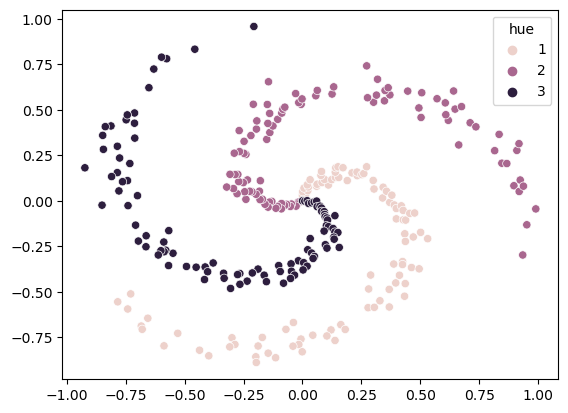

In [62]:
import seaborn as sns
#
sns.scatterplot(x[:, 0], x[:, 1], hue=df['hue'])